In [1]:
from keras.layers import Dense, Input
from keras.optimizers import adam
from keras.losses import mse, binary_crossentropy
from keras.datasets import mnist
from keras.models import Model
import keras.backend as K
from keras.models import load_model
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from numpy.random import seed
seed(13)
from tensorflow import set_random_seed
set_random_seed(13)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = len(set(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
def process(arr):
    arr = arr.reshape((arr.shape[0], arr.shape[1] * arr.shape[2]))
    arr = arr.astype('float32') / arr.max()
    return arr

x_train = process(x_train)
x_test = process(x_test)

In [5]:
encoder_name = "encoder_weights_v1_l4_numbers"
input_shape = (x_train.shape[1], )
inter_dim = 5
latent_dim = 4
batch_size = 500
epochs = 50

In [6]:
encoder = load_model("./encoders/{}".format(encoder_name))

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
c_input = Input(shape=(latent_dim, ))
c_out = Dense(num_classes, activation="softmax")(c_input)

classifier = Model(c_input, c_out)

In [8]:
model = Model(inputs=encoder.input, outputs=classifier(encoder.output))

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['mae', 'acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 432)               339120    
_________________________________________________________________
dense_2 (Dense)              (None, 432)               187056    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1732      
_________________________________________________________________
model_1 (Model)              (None, 10)                50        
Total params: 527,958
Trainable params: 527,958
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 13us/step - loss: 1.2775 - mean_absolute_error: 0.1112 - acc: 0.4994 - val_loss: 0.8094 - val_mean_absolute_error: 0.0763 - val_acc: 0.5993
Epoch 2/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.5244 - mean_absolute_error: 0.0550 - acc: 0.7639 - val_loss: 0.2774 - val_mean_absolute_error: 0.0300 - val_acc: 0.9273
Epoch 3/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.2052 - mean_absolute_error: 0.0215 - acc: 0.9467 - val_loss: 0.1689 - val_mean_absolute_error: 0.0161 - val_acc: 0.9574
Epoch 4/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.1263 - mean_absolute_error: 0.0129 - acc: 0.9672 - val_loss: 0.1548 - val_mean_absolute_error: 0.0132 - val_acc: 0.9626
Epoch 5/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.0899 - mean_absolute_error: 0.0096 - acc: 0.9765 - val_loss: 0.1262 -

60000/60000 [==============================] - 0s 8us/step - loss: 9.8159e-04 - mean_absolute_error: 3.4939e-05 - acc: 0.9999 - val_loss: 0.1459 - val_mean_absolute_error: 0.0046 - val_acc: 0.9793
Epoch 42/50
60000/60000 [==============================] - 0s 8us/step - loss: 9.8886e-04 - mean_absolute_error: 3.2308e-05 - acc: 0.9999 - val_loss: 0.1477 - val_mean_absolute_error: 0.0046 - val_acc: 0.9791
Epoch 43/50
60000/60000 [==============================] - 0s 8us/step - loss: 9.5540e-04 - mean_absolute_error: 2.9562e-05 - acc: 0.9999 - val_loss: 0.1491 - val_mean_absolute_error: 0.0046 - val_acc: 0.9788
Epoch 44/50
60000/60000 [==============================] - 0s 8us/step - loss: 9.6122e-04 - mean_absolute_error: 2.9068e-05 - acc: 0.9999 - val_loss: 0.1499 - val_mean_absolute_error: 0.0045 - val_acc: 0.9793
Epoch 45/50
60000/60000 [==============================] - 0s 8us/step - loss: 9.5624e-04 - mean_absolute_error: 2.7830e-05 - acc: 0.9999 - val_loss: 0.1512 - val_mean_absolute

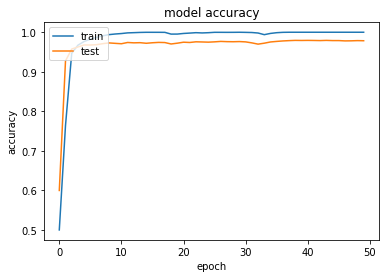

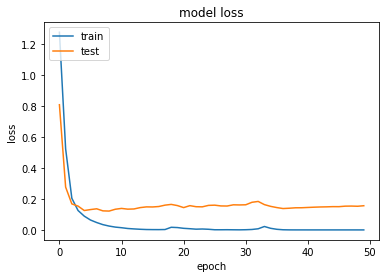

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
def predict(index):
    img = x_test[index]
    actual = list(y_test[index]).index(1)
    out = model.predict(img.reshape(1, img.shape[0]))[0]
    prediction = list(out).index(out.max())
    return img.reshape(28, 28), actual, prediction

In [13]:
incorrect_indexes = []
num_correct = 0
for i in range(len(x_test)):
    img, actual, prediction = predict(i)
    if actual == prediction:
        num_correct += 1
    else:
        incorrect_indexes.append(i)

In [14]:
print("Percent Correct: {}".format((num_correct/len(x_test))*100))

Percent Correct: 97.84


In [15]:
print(incorrect_indexes)

[43, 149, 241, 247, 321, 324, 340, 445, 495, 578, 582, 659, 684, 691, 720, 726, 740, 813, 839, 900, 938, 947, 951, 956, 1014, 1039, 1112, 1156, 1181, 1182, 1224, 1226, 1232, 1242, 1247, 1299, 1319, 1364, 1393, 1425, 1444, 1500, 1527, 1530, 1549, 1553, 1554, 1609, 1641, 1681, 1717, 1751, 1782, 1790, 1823, 1828, 1878, 1901, 1903, 1941, 2004, 2053, 2070, 2073, 2109, 2129, 2135, 2185, 2293, 2299, 2326, 2369, 2387, 2406, 2422, 2433, 2462, 2488, 2597, 2648, 2654, 2720, 2721, 2730, 2742, 2778, 2877, 2915, 2921, 2927, 2930, 2939, 2953, 2995, 3005, 3060, 3073, 3117, 3336, 3405, 3422, 3475, 3503, 3520, 3542, 3558, 3567, 3597, 3604, 3629, 3767, 3780, 3796, 3808, 3811, 3838, 3869, 3893, 3906, 3941, 3943, 3976, 4027, 4065, 4075, 4123, 4176, 4199, 4201, 4248, 4265, 4271, 4289, 4294, 4350, 4360, 4497, 4500, 4536, 4551, 4601, 4639, 4699, 4761, 4807, 4814, 4823, 4876, 4879, 4880, 4943, 4956, 5078, 5138, 5140, 5331, 5457, 5642, 5734, 5749, 5888, 5936, 5937, 5955, 5973, 5997, 6042, 6166, 6173, 6555, 6560

In [16]:
current_index = 0

## Funny Ones:
2109: A three? Really?

247: This is definitly just an H

324: A pair of pants?

582: A guy with no head walking around?

684: Hey, a sword

1393: A fish hook is apparently a 5

1527: Oh cool, a microscope

1549: Hey, another H

1790: Oh scary, a snake

2018: This almost looks like a gun

2266: Another microscope?

2654: And a tentacle

3062: Lowercase Delta

3780: Does everyone write fours as Hs?

3941: Yes, everyone does

4294: Why is the 9 doing a back bend?

4497: Ooo, a watergun

5078: This could be a cool fountain, or maybe it's steam

I cant go on anymore, I got to 5138

This is index 321
Model predicted 6, but it was actually 4


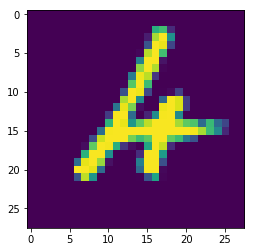

In [21]:
img, actual, prediction = predict(incorrect_indexes[current_index])
img, actual, prediction = predict(2266)
print("This is index {}".format(incorrect_indexes[current_index]))
if actual == prediction:
    print("Model acuratly predicted: {}".format(actual))
else:
    print("Model predicted {}, but it was actually {}".format(prediction, actual))
plt.imshow(img)
current_index += 1